# Hierarchical Clustering - Bank Marketing Clustering.   

[Zoumana KEITA](https://zoumanakeita.medium.com/)

## Information about the data

In [2]:
import pandas as pd

URL = "https://raw.githubusercontent.com/keitazoumana/Medium-Articles-Notebooks/main/data/bank.csv"
bank_data = pd.read_csv(URL, sep=";")
bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# Information about the data
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


We can see that the data has 14 columns of numerical types except **purpose** which is **object** and gives the textual description of the purpose of the load. This column will not be included in our analysis.  

## Preprocessing the data

In [4]:
# Compute percentage of missing values in each column
percent_missing = round(100*(bank_data.isnull().sum())/len(bank_data), 2)
percent_missing

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

### Select columns of interest

In [8]:
# Remove irrelevant columns
import numpy as np

cleaned_data = bank_data.select_dtypes(include=[np.int64])
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       4521 non-null   int64
 1   balance   4521 non-null   int64
 2   day       4521 non-null   int64
 3   duration  4521 non-null   int64
 4   campaign  4521 non-null   int64
 5   pdays     4521 non-null   int64
 6   previous  4521 non-null   int64
dtypes: int64(7)
memory usage: 247.4 KB


In [9]:
cleaned_data.sample(5)

,age,balance,day,duration,campaign,pdays,previous
4109,40,177,21,742,4,-1,0
2809,57,75,28,118,2,-1,0
900,33,5235,7,67,3,-1,0
876,33,595,7,22,2,-1,0
3348,31,1882,7,529,2,-1,0


### Analyze outliers

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

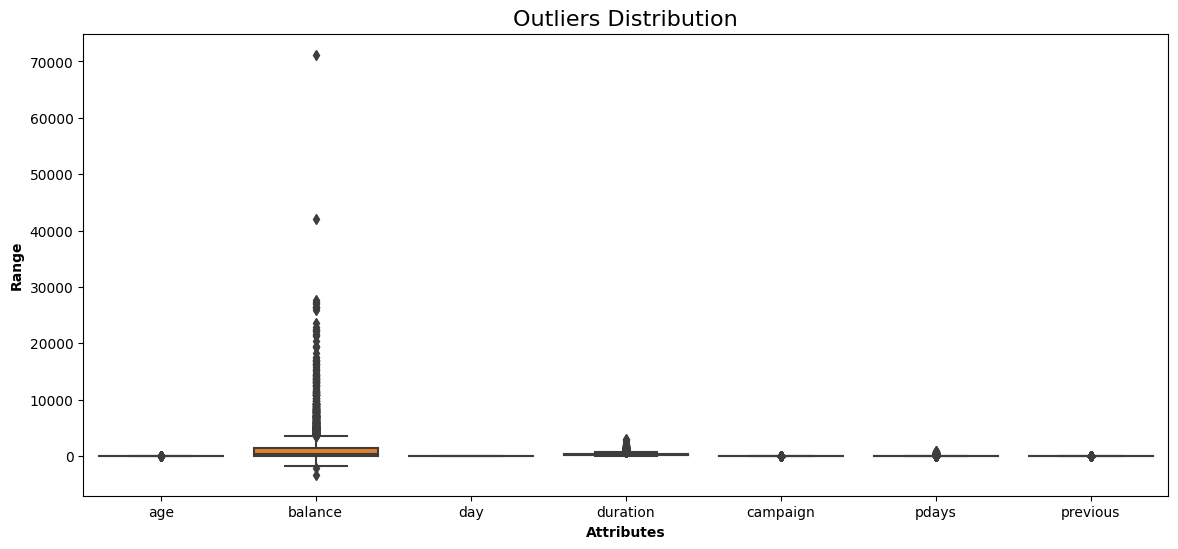

In [10]:
def show_boxplot(df):
    plt.rcParams['figure.figsize'] = [14,6]
    sns.boxplot(data = df, orient="v")
    plt.title("Outliers Distribution", fontsize = 16)
    plt.ylabel("Range", fontweight = 'bold')
    plt.xlabel("Attributes", fontweight = 'bold')

show_boxplot(cleaned_data)

In [11]:
# Remove outliers
def remove_outliers(data):

    df = data.copy()

    for col in list(df.columns):

        # Compute interquantile range
        Q1 = df[str(col)].quantile(0.05)
        Q3 = df[str(col)].quantile(0.95)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5*IQR
        upper_bound = Q3 + 1.5*IQR

        df = df[(df[str(col)] >= lower_bound) & (df[str(col)] <= upper_bound)]

    return df

without_outliers = remove_outliers(cleaned_data)

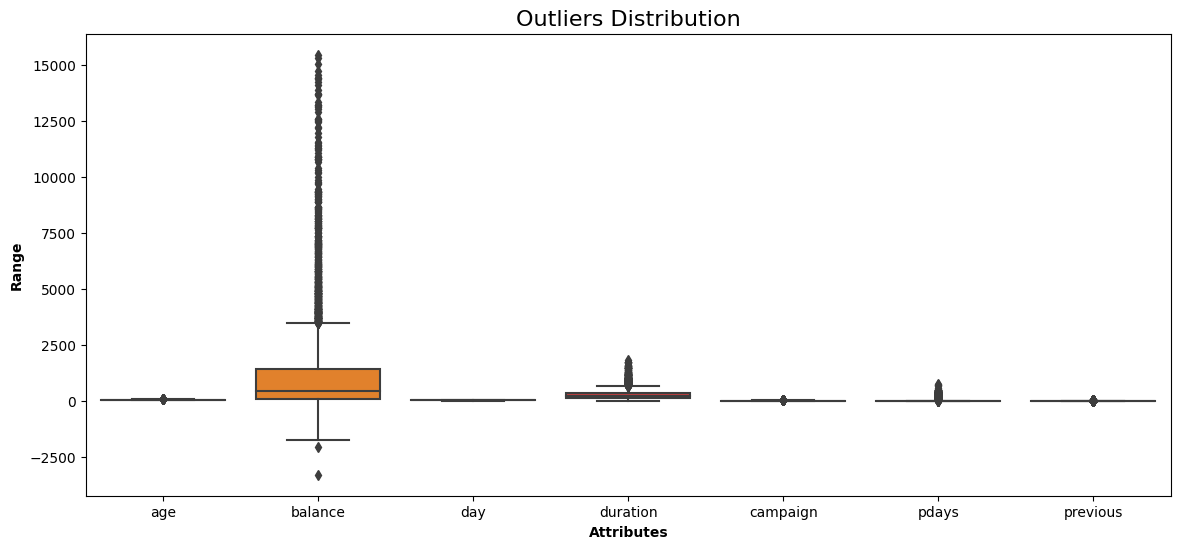

In [26]:
show_boxplot(without_outliers)

In [12]:
without_outliers.shape

(4393, 7)

In [13]:
4520-4393

127

### Rescale the data

In [14]:
from sklearn.preprocessing import StandardScaler

# Instantiate the scaler
data_scaler = StandardScaler()

# fit_transform
scaled_data = data_scaler.fit_transform(without_outliers)
scaled_data.shape

(4393, 7)

## Applying the hierarchical clustering   
We will use the complete linkage with the Euclidean distance in this section.

In [15]:
# The function for hierarchical clustering
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree

In [16]:
# Perform the clusterings
complete_clustering = linkage(scaled_data, method="complete", metric="euclidean")
average_clustering = linkage(scaled_data, method="average", metric="euclidean")
single_clustering = linkage(scaled_data, method="single", metric="euclidean")

Plot the results of the clustering.

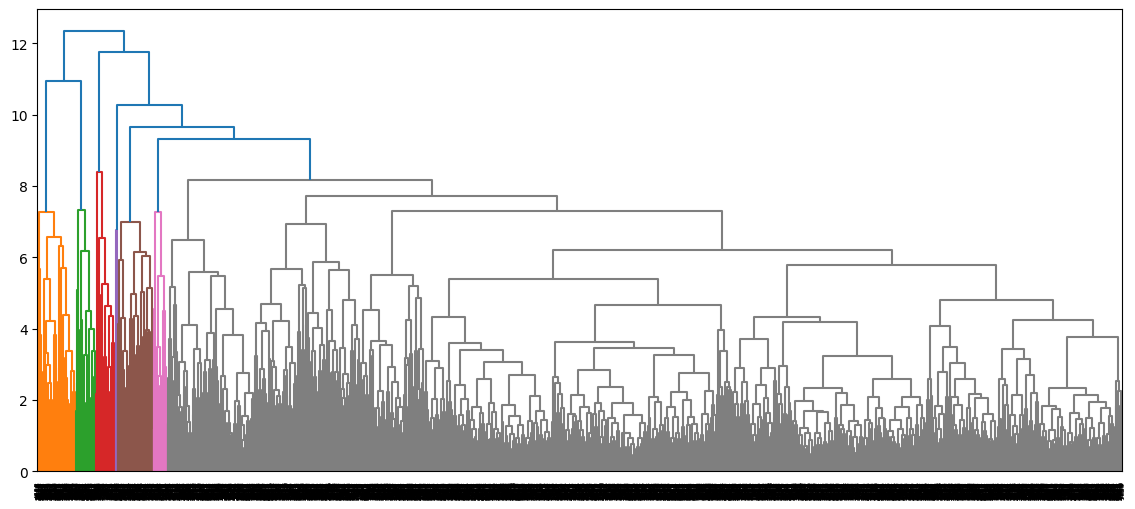

In [17]:
# Complete clustering
dendrogram(complete_clustering)

# Show the dendogram
plt.show()

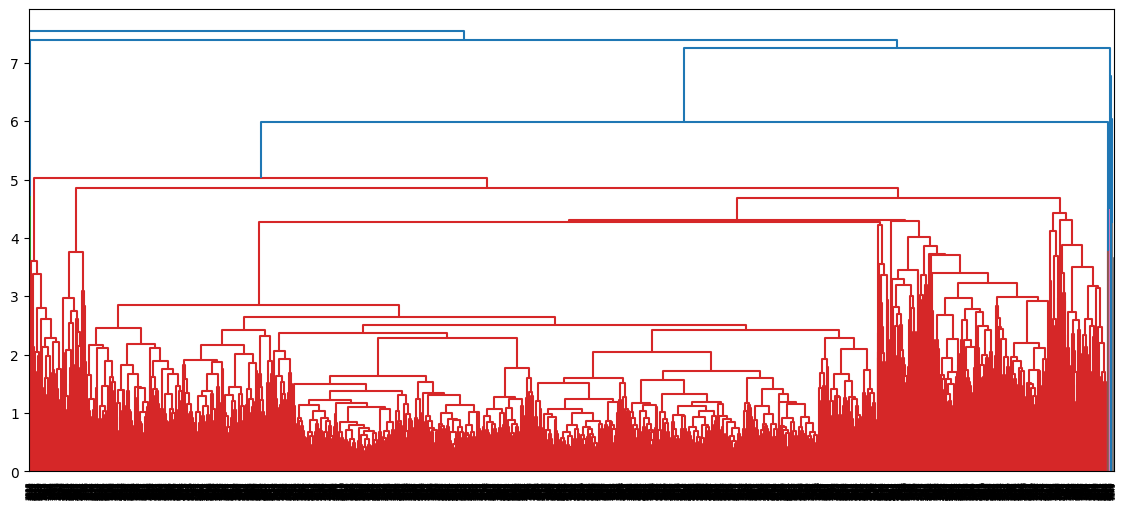

In [18]:
# Average clustering
dendrogram(average_clustering)

# Show the dendogram
plt.show()

In [20]:
import sys
sys.setrecursionlimit(1000000)

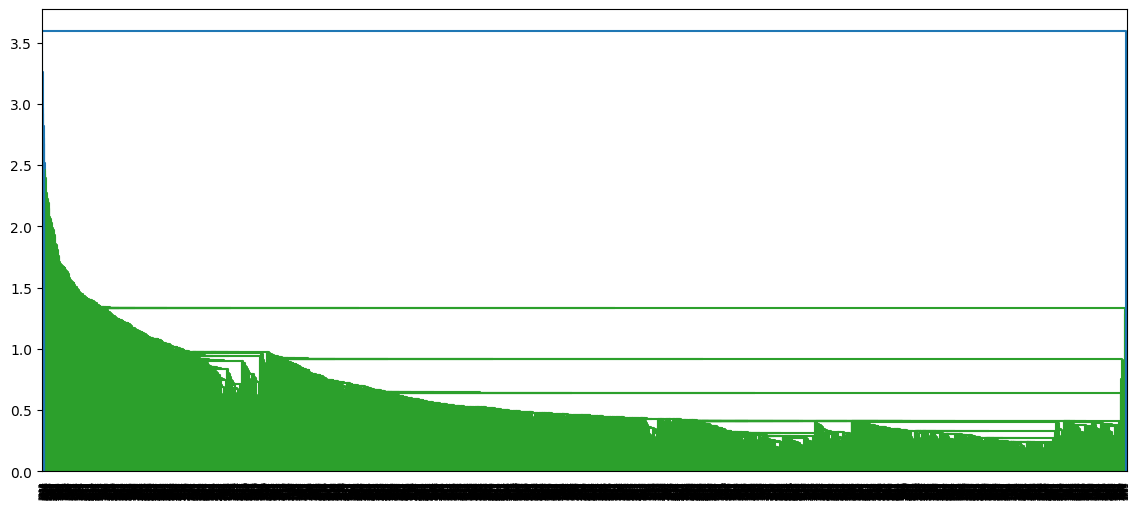

In [21]:
# Single clustering
dendrogram(single_clustering)

# Show the dendogram
plt.show()

## Observation of the Average Linkage clustering

<Axes: xlabel='Cluster', ylabel='balance'>

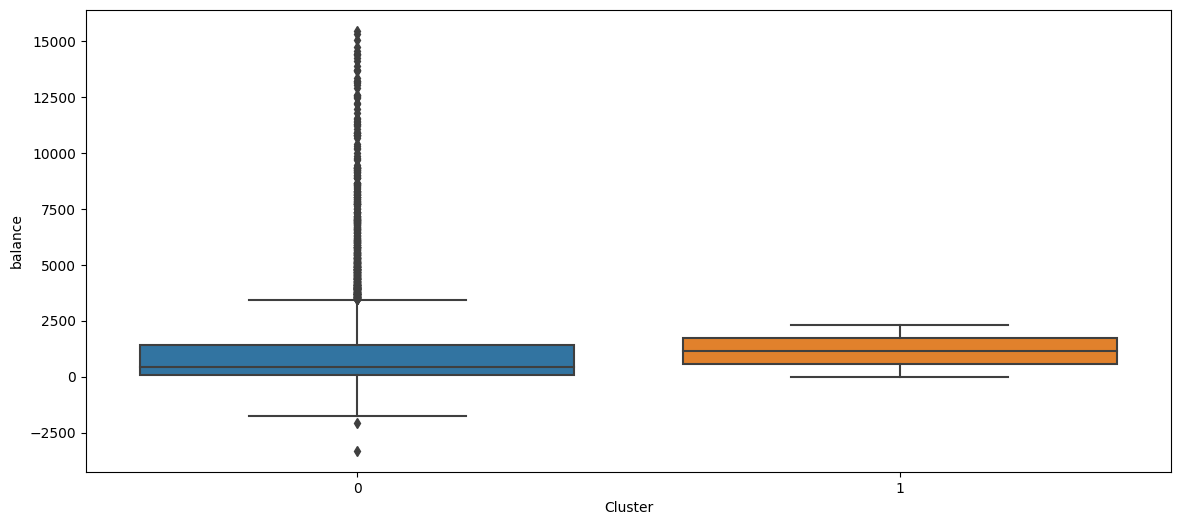

In [24]:
cluster_labels = cut_tree(average_clustering, n_clusters=2).reshape(-1, )
without_outliers["Cluster"] = cluster_labels

sns.boxplot(x='Cluster', y='balance', data=without_outliers)